# MSCI Small Cap World ETF vs. MSCI World ETF 

Chart comparison of MSCI Small Cap ETF with replicated MSCI World ETF

1. MSCI World ETF: XTrackers (replicated)
2. SPDR MSCI World Small Cap


Following code contains data fetch from Yahoo Finance, plot comparison and a simple statistical analysis of both ETFs. Goal: identify potential similarity.

In [1]:
# base code for Yahoo Finance API data access
import yfinance as yf

# get ticker from Frankfurt Stock exchange
msft = yf.Ticker("ZPRS.F")

# get historical market data
hist = msft.history(period="1y")
import matplotlib.pyplot as plt
import seaborn

# Plot everything by leveraging the very powerful matplotlib package
hist['Close'].plot(figsize=(16, 9))
plt.show()

<Figure size 1600x900 with 1 Axes>

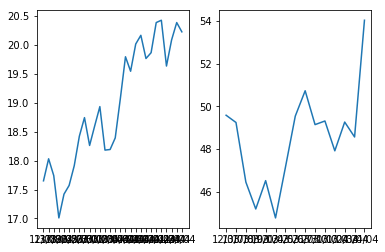

In [2]:
# PLOT comparison
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn

# tracker for AMUNDI and XTRACKER MSCI WORLD based ETF
xtracker_msci = yf.Ticker("XMAW.DE")
world_small_cap = yf.Ticker("ZPRS.F")

# get historical data (30 days)
hist_xtracker = xtracker_msci.history(period="30d")
hist_small_cap = world_small_cap.history(period="30d")

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(hist_xtracker.index.strftime('%d/%m'), hist_xtracker['Close'])
axes[1].plot(hist_small_cap.index.strftime('%d/%m'), hist_small_cap['Close'])

plt.show()

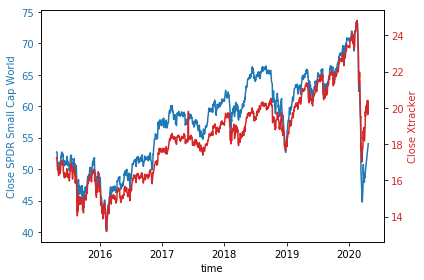

In [3]:
# PLOT comparison on same figure (different axes)
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn

#get data from FRA stock exchange
xtracker_msci = yf.Ticker("XMAW.DE")
spdr_small_cap = yf.Ticker("ZPRS.F")

# stock info print(msft.info)

# get data from 30
hist_xtracker = xtracker_msci.history(period="5y")
hist_small_cap = spdr_small_cap.history(period="5y")

fig, ax_spdr = plt.subplots()

color = 'tab:blue'
ax_spdr.set_xlabel('time')
ax_spdr.set_ylabel('Close SPDR Small Cap World', color=color)
ax_spdr.plot(hist_small_cap.index, hist_small_cap['Close'], color=color)
ax_spdr.tick_params(axis='y', labelcolor=color)

ax_xtrackers = ax_spdr.twinx() 

color = 'tab:red'
ax_xtrackers.set_ylabel('Close Xtracker', color=color) 
ax_xtrackers.plot(hist_xtracker.index, hist_xtracker['Close'], color=color)
ax_xtrackers.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()


--> Similar increase over time. Implies dependence.

In [4]:
# get min max ratio
min_max_ratio_xtracker = 1 - min(hist_xtracker['Close'])/max(hist_xtracker['Close'])
min_max_ratio_spdr = 1 - min(hist_small_cap['Close'])/max(hist_small_cap['Close'])
print(min_max_ratio_xtracker)
print(min_max_ratio_spdr)

0.468787756746
0.455323193916


## Further analysis

Check Bravais - Pearson correlation coefficient $r_{xy} \in [0,1]$ where 0 implies no correlation and 1 implies a high correlation between two data samples.

In [5]:
### define basic statistical operations ###
from math import sqrt

def calc_mean(sample):
    n = len(sample)
    sum_of_items = 0.0
    for item in sample:
        sum_of_items = sum_of_items + item
    return sum_of_items / n

def calc_variance(sample):
    n = len(sample)
    mean = calc_mean(sample)
    temp = 0
    for item in sample:
        temp = temp + ((item - mean)**2)
    return temp / (n)

def calc_sample_covariance(x,y):
    if len(x) != len(y):
        print(len(x))
        print(len(y))
        print("len(x) != len(y)")
        return 0
    n = len(x)
    mean_x = calc_mean(x)
    mean_y = calc_mean(y)
    temp = 0
    for i in range(n):
        temp = temp + ((y[i] - mean_y)*(x[i] - mean_x))
    return temp / (n-1)

def calc_corr_coeff(x,y):
    cov = calc_sample_covariance(x,y)
    var1 = sqrt(calc_variance(x))
    var2 = sqrt(calc_variance(y))
    return cov/(var1*var2)

In [6]:
# trim data as amount of historical values is not identical
x = hist_xtracker['Close'][0:1248]
y = hist_small_cap['Close']

In [7]:
# get variance
var_xtracker = calc_variance(x)
var_spdr = calc_variance(y)
print(var_xtracker)
print(var_spdr)

5.64095732249
49.966126528


In [8]:
# get Bravais - Pearson correlation coefficient
calc_corr_coeff(x,y)

0.9534162235759652

## Result 

Both ETFs show similar characteristics w.r.t. growth, min/max ratio and correlation.
--> Although the MSCI Small Cap Word represents a different set of stocks compared to the MSCI World, both ETFs show significant similarities. Based on this simple analysis, Small Caps seem to be underlying the same market dynamics as the major stocks. 

Difference lies in the variance as the the MSCI Small Cap World has wider spread in data points. Potentially interesting for short term investments implying more efforts for tracking and observation.